### Import the Libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Q1. Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required

### Load the Dataset and Prepare testing and training data

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Change the Datatype to Float and Normalize it

In [ ]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [ ]:
x_train.dtype


dtype('float64')

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


### Do the one hot Encoding of the Dependent Variable using Keras.utils

In [ ]:
import tensorflow
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes= len(np.unique(y_train))

In [ ]:
num_classes

10

In [ ]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [ ]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation and Training

In [ ]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [ ]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [ ]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


## Q2. Build a CNN architecture with Keras and stack an ANN on top of CNN

### Import the Deep Learning Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


### Build a CNN Architecture with Keras

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [ ]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



In [ ]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

### Stack an ANN on top of CNN

In [ ]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [ ]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [ ]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

### Fit the model

In [ ]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=50,verbose=2,batch_size=500)

Epoch 1/50
90/90 - 21s - loss: 1.1100 - accuracy: 0.6010 - val_loss: 1.1752 - val_accuracy: 0.5792 - 21s/epoch - 238ms/step
Epoch 2/50
90/90 - 20s - loss: 1.0758 - accuracy: 0.6118 - val_loss: 1.2045 - val_accuracy: 0.5772 - 20s/epoch - 222ms/step
Epoch 3/50
90/90 - 20s - loss: 1.0621 - accuracy: 0.6189 - val_loss: 1.1452 - val_accuracy: 0.6016 - 20s/epoch - 221ms/step
Epoch 4/50
90/90 - 20s - loss: 1.0202 - accuracy: 0.6334 - val_loss: 1.1755 - val_accuracy: 0.5904 - 20s/epoch - 219ms/step
Epoch 5/50
90/90 - 20s - loss: 0.9829 - accuracy: 0.6473 - val_loss: 1.1369 - val_accuracy: 0.6022 - 20s/epoch - 219ms/step
Epoch 6/50
90/90 - 20s - loss: 0.9578 - accuracy: 0.6545 - val_loss: 1.1494 - val_accuracy: 0.6028 - 20s/epoch - 219ms/step
Epoch 7/50
90/90 - 20s - loss: 0.9226 - accuracy: 0.6677 - val_loss: 1.1597 - val_accuracy: 0.6066 - 20s/epoch - 221ms/step
Epoch 8/50
90/90 - 20s - loss: 0.8977 - accuracy: 0.6772 - val_loss: 1.1373 - val_accuracy: 0.6176 - 20s/epoch - 220ms/step
Epoch 9/

## Q3. Fit and evaluate the model. Plot the training and validation curves.


### Evaluate the Results

In [ ]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.2786 - accuracy: 0.5447


In [ ]:
results

[1.278633713722229, 0.544700026512146]

In [ ]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

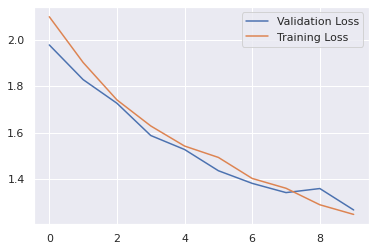

In [ ]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

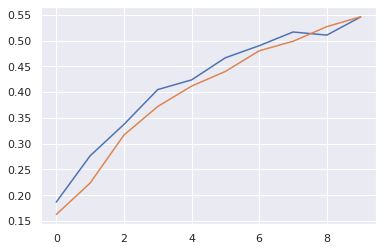

In [ ]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;